In [1]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling

In [2]:
df = pd.read_csv('archive/train.csv')

In [3]:
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
9710,496,50000,1,1,1,41,-1,-1,-1,-1,...,390,220,320,1000,390,1000,220,640,1000,0
430,17491,50000,2,2,3,39,0,0,0,0,...,45784,50072,49112,6000,5000,5000,8000,4000,4000,0
15004,26215,360000,2,1,2,37,-2,-2,-2,-2,...,0,0,0,260416,72200,0,0,0,0,0
1506,12653,100000,1,3,2,29,0,0,0,0,...,6810,-3,-3,2000,1000,1039,12920,0,0,0
12440,1792,200000,2,1,2,26,0,0,0,0,...,14973,20542,15810,1502,1200,300,7000,8000,4000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [5]:
nums = [
    'LIMIT_BAL', 'AGE', 
    'BILL_AMT1', 'BILL_AMT2', 
    'BILL_AMT3', 'BILL_AMT4',
    'BILL_AMT5', 'BILL_AMT6', 
    'PAY_AMT1', 'PAY_AMT2',
    'PAY_AMT3', 'PAY_AMT4',
    'PAY_AMT5', 'PAY_AMT6'
]
cats = [
    'SEX', 'EDUCATION',
    'MARRIAGE', 'PAY_0',
    'PAY_2', 'PAY_3',
    'PAY_4', 'PAY_5',
    'PAY_6'
]

### Missing Value

In [6]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

### Duplicated Data

In [7]:
df.duplicated().sum()

0

### Outliers Handling

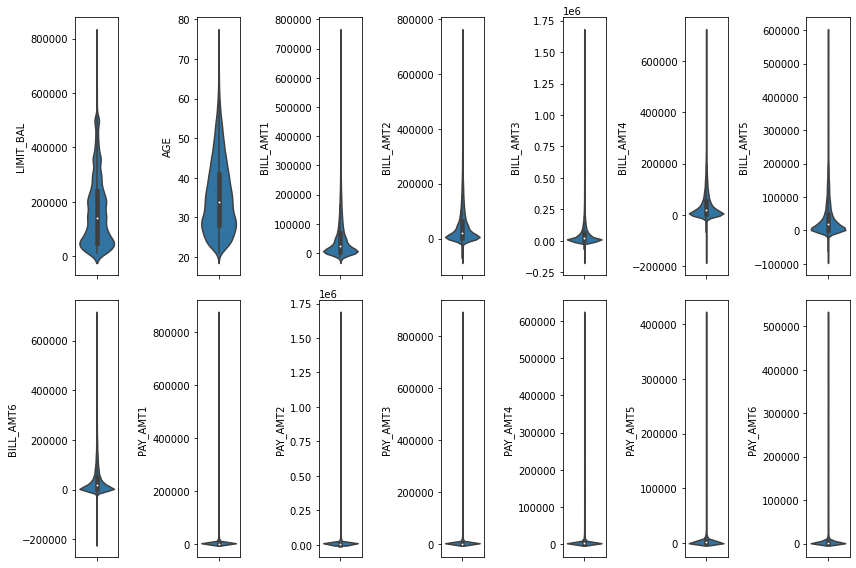

In [8]:
plt.figure(figsize=(12, 8))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)/2, i+1)
    sns.violinplot(y=df[nums[i]])
    plt.tight_layout()

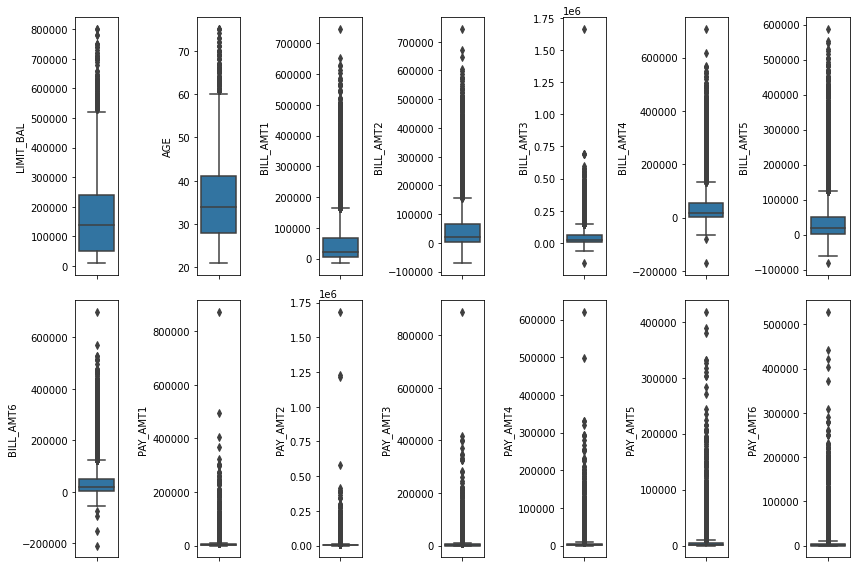

In [9]:
plt.figure(figsize=(12, 8))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)/2, i+1)
    sns.boxplot(y=df[nums[i]])
    plt.tight_layout()

In [10]:
print(f'Jumlah baris sebelum memfilter outliers: {len(df)}')
filtered_entries = np.array([True] * len(df))

for i in nums:
    zscore = abs(stats.zscore(df[i]))
    filtered_entries = (zscore < 3) & filtered_entries

df = df[filtered_entries]
print(f'Jumlah baris setelah memfilter outliers: {len(df)}')

Jumlah baris sebelum memfilter outliers: 21000
Jumlah baris setelah memfilter outliers: 18945


In [11]:
df[nums].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000
mean,152052.362101,35.193455,41382.812721,39366.196780,37124.082344,33859.918237,31298.988335,29994.349116,3765.237635,3795.178886,3292.848245,2969.585273,2926.982740,3007.029348
std,117898.040057,9.030033,51566.262828,49567.703102,47252.635531,44065.603776,41982.145927,41258.736028,5831.561038,6568.409159,5744.487917,5414.117558,5147.002608,5802.942543
min,10000.000000,21.000000,-9802.000000,-69777.000000,-46127.000000,-50616.000000,-53007.000000,-94625.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3144.000000,2549.000000,2300.000000,1900.000000,1368.000000,938.000000,750.000000,643.000000,326.000000,155.000000,104.000000,0.000000
50%,130000.000000,34.000000,20110.000000,19432.000000,18742.000000,17812.000000,16256.000000,14629.000000,2000.000000,2000.000000,1600.000000,1260.000000,1300.000000,1200.000000
75%,220000.000000,41.000000,58363.000000,53997.000000,50639.000000,47643.000000,43115.000000,40574.000000,4567.000000,4250.000000,3799.000000,3300.000000,3365.000000,3240.000000
max,550000.000000,63.000000,271115.000000,261430.000000,254970.000000,234928.000000,219354.000000,214879.000000,56270.000000,77000.000000,56116.000000,50918.000000,50086.000000,57258.000000


### Feature Transformation

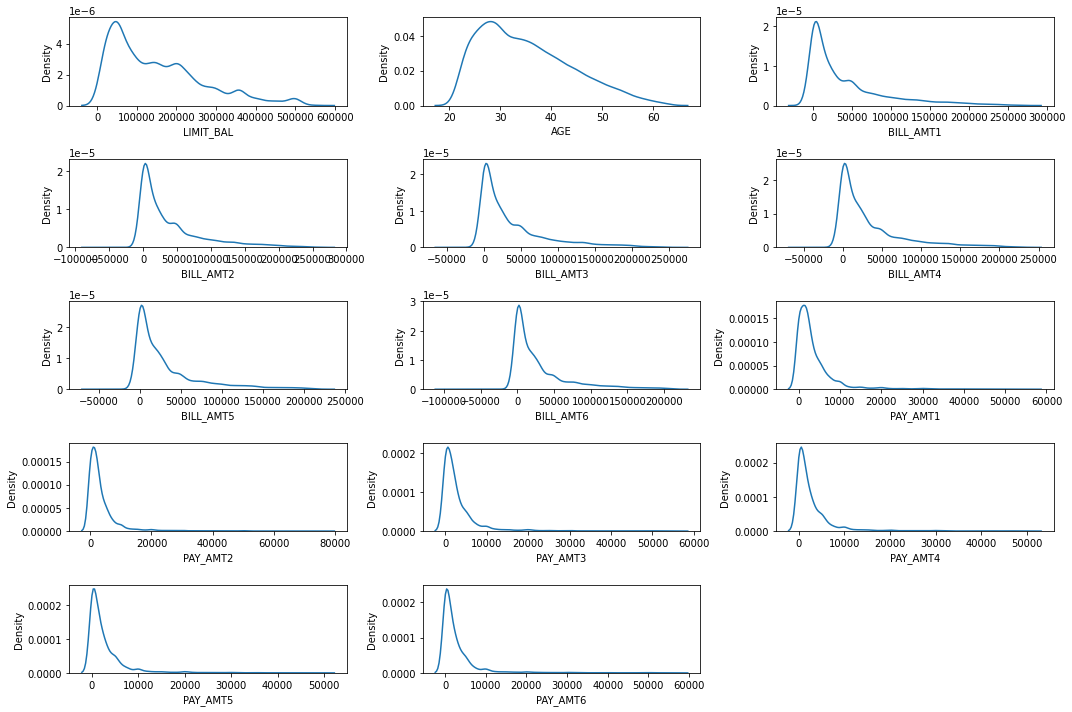

In [12]:
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(5, len(nums)/4, i+1)
    sns.kdeplot(x=df[nums[i]])
    plt.xlabel(nums[i])
    plt.tight_layout()

In [13]:
for i in range(0, len(nums)):
    df[nums[i]] = (
        RobustScaler()
        .fit_transform(
            df[nums[i]]
            .values
            .reshape(len(df[nums[i]]), 1))
    )

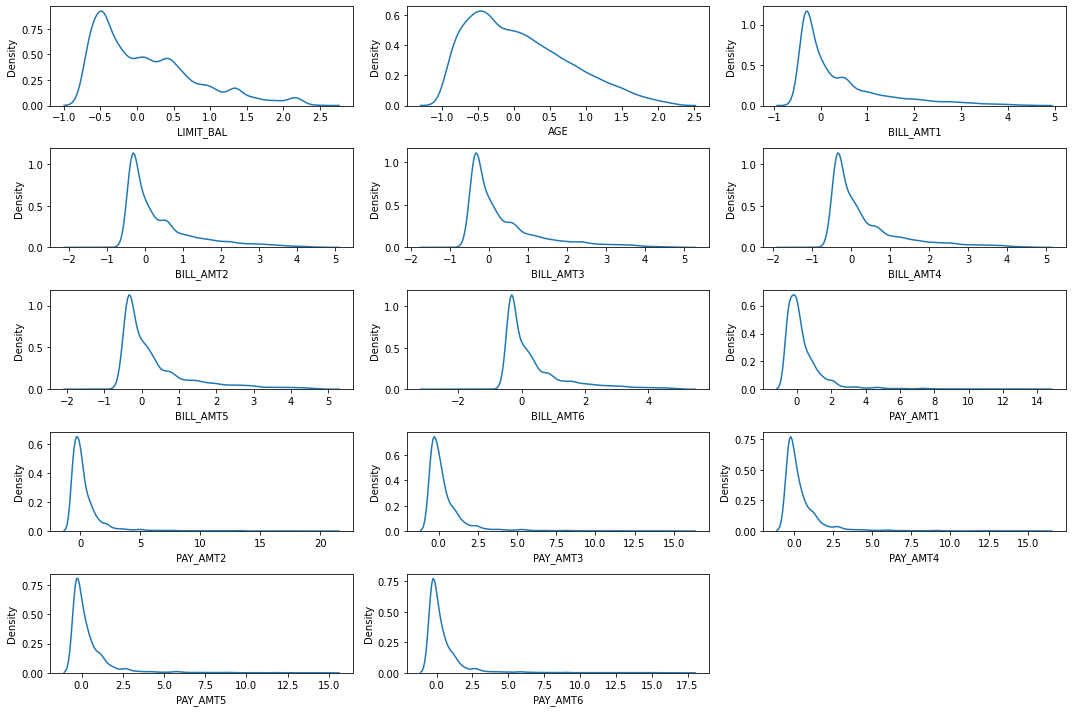

In [14]:
plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(5, len(nums)/4, i+1)
    sns.kdeplot(x=df[nums[i]])
    plt.xlabel(nums[i])
    plt.tight_layout()

In [15]:
df[nums].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000,18945.000000
mean,0.129720,0.091804,0.385244,0.387463,0.380274,0.350828,0.360337,0.387661,0.462467,0.497693,0.487431,0.543588,0.498921,0.557725
std,0.693518,0.694618,0.933850,0.963452,0.977526,0.963330,1.005633,1.040941,1.527786,1.821017,1.654042,1.721500,1.578351,1.791032
min,-0.705882,-1.000000,-0.541698,-1.733964,-1.341960,-1.495923,-1.659113,-2.756434,-0.523972,-0.554477,-0.460697,-0.400636,-0.398651,-0.370370
25%,-0.470588,-0.461538,-0.307249,-0.328157,-0.340139,-0.347857,-0.356624,-0.345418,-0.327482,-0.376213,-0.366830,-0.351351,-0.366759,-0.370370
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.529412,0.538462,0.692751,0.671843,0.659861,0.652143,0.643376,0.654582,0.672518,0.623787,0.633170,0.648649,0.633241,0.629630
max,2.470588,2.230769,4.545627,4.703740,4.886903,4.746431,4.864972,5.052225,14.217972,20.792903,15.697092,15.789507,14.960442,17.301852


In [16]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

### Split Train-Test Data

In [17]:
X = df.drop(['default_payment_next_month'], axis=1)
y = df['default_payment_next_month']

X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size=0.3, random_state=42)
)

print(len(X_train))
print(len(X_test))

13261
5684


### Imbalanced on Data Train

In [18]:
df['default_payment_next_month'].value_counts()

0    14586
1     4359
Name: default_payment_next_month, dtype: int64

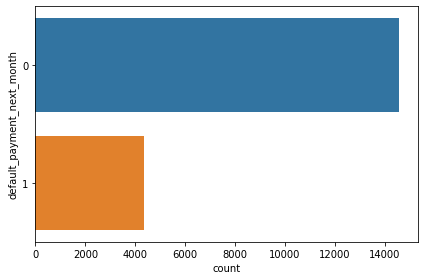

In [19]:
sns.countplot(y=df['default_payment_next_month'])
plt.tight_layout()

In [20]:
X_over_SMOTE, y_over_SMOTE = (
    over_sampling
    .SMOTE(0.5)
    .fit_resample(X, y)
)

print('Hasil SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Hasil SMOTE
0    14586
1     7293
Name: default_payment_next_month, dtype: int64


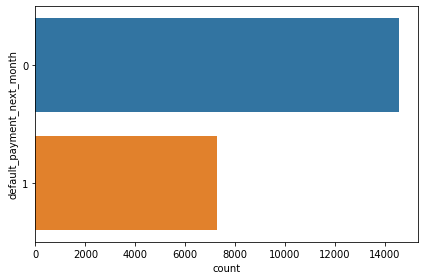

In [22]:
sns.countplot(y=y_over_SMOTE)
plt.tight_layout()